In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [25]:
# Load dataset
df = pd.read_csv("/content/Titanic_test.csv")
df1 = pd.read_csv("/content/Titanic_train.csv")
display(df.head())

display(df1.head())


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# Combining both dataset into together

df_combined = pd.concat([df, df1], ignore_index=True)
display(df_combined)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


In [27]:
# EDA
# Check missing values
print(df_combined.isnull().sum())


PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64


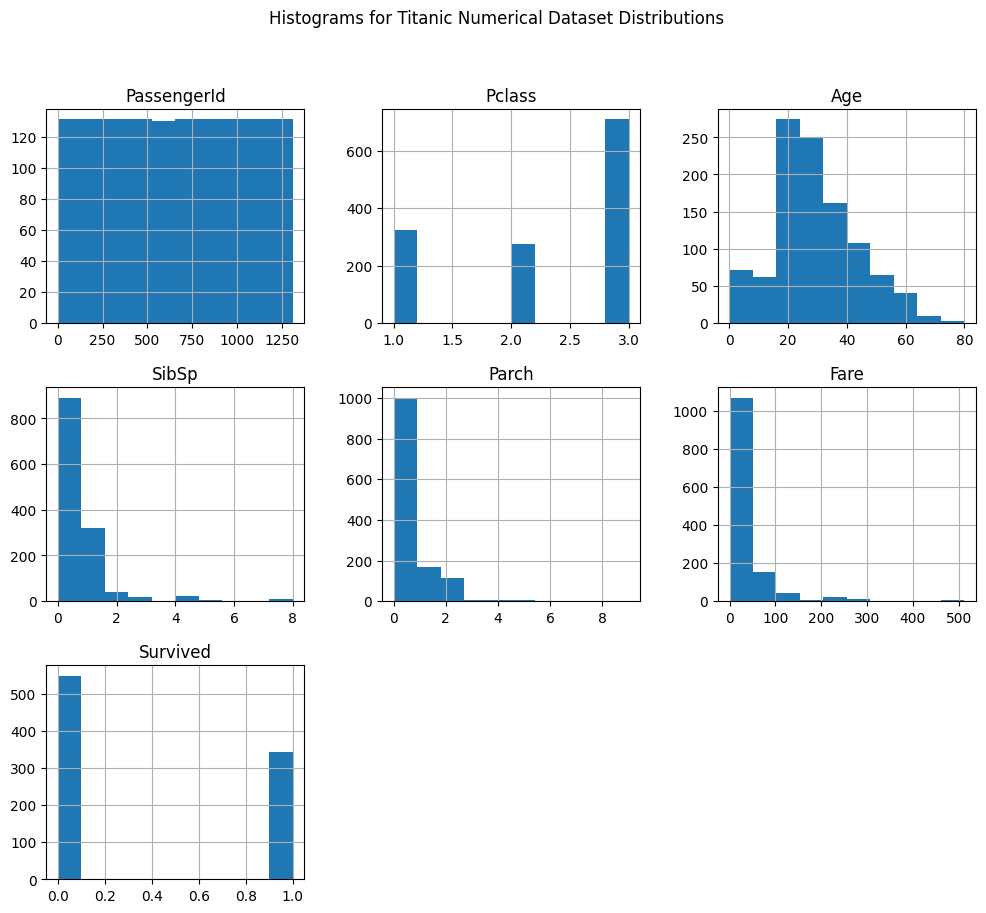

In [28]:
# Histograms for distributions
df_combined.hist(figsize=(12,10))
plt.suptitle("Histograms for Titanic Numerical Dataset Distributions")
plt.show()


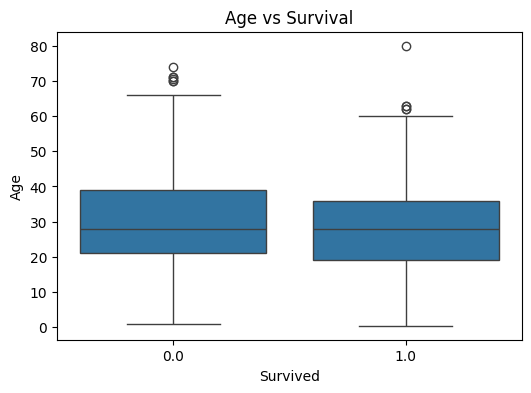

In [29]:
# Boxplots
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df_combined)
plt.title("Age vs Survival")
plt.show()

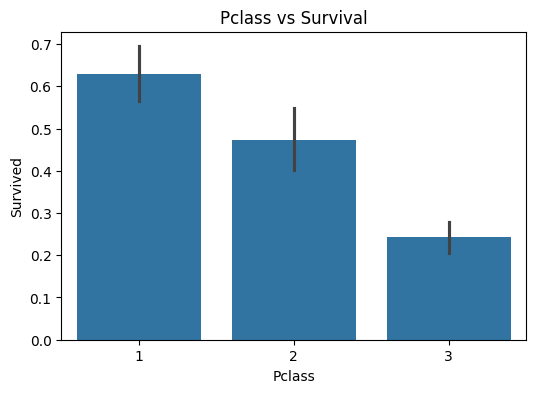

In [30]:
# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df_combined)
plt.title("Pclass vs Survival")
plt.show()

In [31]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [38]:
# Fill missing Age with median
df_combined['Age'] = df_combined['Age'].fillna(df_combined['Age'].median())

# Fill missing Embarked with mode
df_combined['Embarked'] = df_combined['Embarked'].fillna(df_combined['Embarked'].mode()[0])

# Fill missing Fare with median
df_combined['Fare'] = df_combined['Fare'].fillna(df_combined['Fare'].median())

In [41]:
# Encode categorical variables
le = LabelEncoder()
df_combined['Sex'] = le.fit_transform(df_combined['Sex'])
df_combined['Embarked'] = le.fit_transform(df_combined['Embarked'])

In [40]:
print(df_combined.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')


In [48]:
X = df_combined.drop('Survived', axis=1)
y = df_combined['Survived']

# Drop rows where 'Survived' is NaN
nan_survived_indices = y[y.isna()].index
X = X.drop(nan_survived_indices)
y = y.drop(nan_survived_indices)

- X = features used to predict survival.
- y = target(Survived column).

In [49]:
# Scale numerical features
scaler = StandardScaler()
X[['Age', 'Fare','SibSp','Parch']] = scaler.fit_transform(X[['Age', 'Fare','SibSp','Parch']])

In [50]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

Split dataset: 80% training, 20% testing.

stratify=y Keeps survival ratio balanced in both sets.

In [54]:
# Build Models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

xgb_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:48:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


LGBMClassifier(random_state=42)

In [56]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)

- Initialize XGBoost and LighGBM models.
- Train them using training data.


In [57]:
# Evalution
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation Report for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision",precision_score(y_test, y_pred))
    print("Recall", recall_score(y_test, y_pred))
    print("F1 Score", f1_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [58]:
# Compare Results
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_lgbm, "LightGBM")

Evaluation Report for XGBoost:
Accuracy: 0.8100558659217877
Precision 0.7536231884057971
Recall 0.7536231884057971
F1 Score 0.7536231884057971
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       110
         1.0       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Evaluation Report for LightGBM:
Accuracy: 0.7988826815642458
Precision 0.7619047619047619
Recall 0.6956521739130435
F1 Score 0.7272727272727273
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       110
         1.0       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



- Prints metrics for both models separately.


      Model  Accuracy  Precision    Recall  F1 Score
0   XGBoost  0.810056   0.753623  0.753623  0.753623
1  LightGBM  0.798883   0.761905  0.695652  0.727273


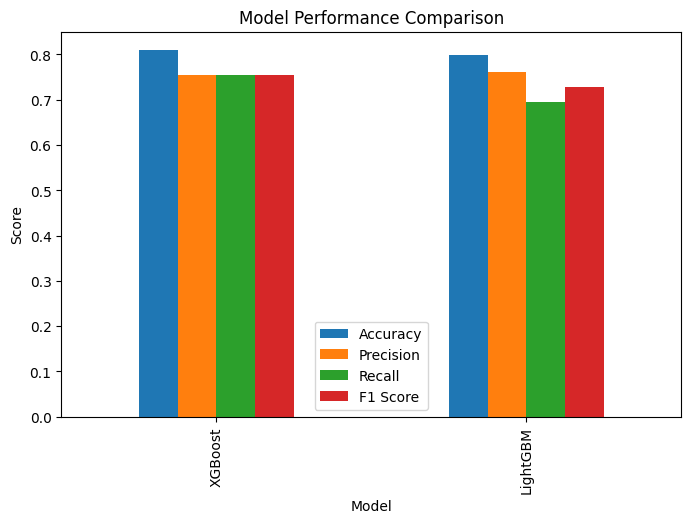

In [61]:
# Comparative Analysis
metrics ={
    "Model": ["XGBoost", "LightGBM"],
    "Accuracy": [accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_lgbm)],
    "Precision": [precision_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_lgbm)],
    "Recall": [recall_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_lgbm)],
    "F1 Score": [f1_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_lgbm)]
}

results_df = pd.DataFrame(metrics)
print(results_df)

results_df.set_index("Model")[['Accuracy','Precision','Recall','F1 Score']].plot(kind='bar', figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

- Creates a comparison table of metrics.
- Plots a bar chart to visually compare LightGBM vs XGBoost.